# Data Cleaning, Preparation, and Exploration - IMT 572 Final Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read data file
#ds= pd.read_csv('C:\\Users\\stlp\\OneDrive - UW\\Documents\\Study Material\\572\\Life Expectancy Data.csv')
data = pd.read_csv('../../data/Life Expectancy Data.csv')

In [3]:
data.shape

(2938, 22)

In [4]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
#Converting Categorical Values using Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Country'] = le.fit_transform(data['Country'])

le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])

In [7]:
#Filling null values with the mean values to handle missing values
x = data['Life expectancy '].mean()
data['Life expectancy '].fillna(x, inplace=True)

x = data['Adult Mortality'].mean()
data['Adult Mortality'].fillna(x, inplace=True)

x = data['Alcohol'].mean()
data['Alcohol'].fillna(x, inplace=True)

x = data['Hepatitis B'].mean()
data['Hepatitis B'].fillna(x, inplace=True)

x = data[' BMI '].mean()
data[' BMI '].fillna(x, inplace=True)

x = data['Polio'].mean()
data['Polio'].fillna(x, inplace=True)

x = data['Total expenditure'].mean()
data['Total expenditure'].fillna(x, inplace=True)

x = data['Diphtheria '].mean()
data['Diphtheria '].fillna(x, inplace=True)

x = data['GDP'].mean()
data['GDP'].fillna(x, inplace=True)

x = data['Population'].mean()
data['Population'].fillna(x, inplace=True)

x = data[' thinness  1-19 years'].mean()
data[' thinness  1-19 years'].fillna(x, inplace=True)

x = data[' thinness 5-9 years'].mean()
data[' thinness 5-9 years'].fillna(x, inplace=True)

x = data['Income composition of resources'].mean()
data['Income composition of resources'].fillna(x, inplace=True)

x = data['Schooling'].mean()
data['Schooling'].fillna(x, inplace=True)

Measles Vaccination is not in percentage (Min:0, Max: 212183), rest of the vaccinations are in percentage value

In [8]:
#Scaling the values of Measles
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 99))
data[["ScaledMeasles"]] = scaler.fit_transform(data[["Measles "]]) #Adding a new column for scaled value
print(data['Measles '])

0       1154
1        492
2        430
3       2787
4       3013
        ... 
2933      31
2934     998
2935     304
2936     529
2937    1483
Name: Measles , Length: 2938, dtype: int64


In [9]:
#Checking data summary statistics again to verify ScaledMeasles value ( Min:0,Max:99)
data.describe()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,ScaledMeasles
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,95.096324,2007.518720,0.825732,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,1.128929
std,56.244904,4.613841,0.379405,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,...,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381,5.350381
min,0.000000,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000
25%,46.000000,2004.000000,1.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,...,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000,0.000000
50%,93.000000,2008.000000,1.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,...,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000,0.007932
75%,145.000000,2012.000000,1.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,...,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000,0.168085
max,192.000000,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,...,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,99.000000


In [10]:
#Dropping unscaled Measles column values
data.drop(['Measles '], axis=1, inplace=True)
data.rename(columns={'ScaledMeasles':'Measles'}, inplace=True)

In [11]:
#Evaluating correlation amongst features or variables
data.corr()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Measles
Country,1.000000,0.001342,-0.031635,-0.016745,0.039760,-0.030528,-0.060052,-0.032983,-0.018918,0.017724,...,0.053226,-0.006119,0.090206,-0.015201,-0.014347,0.007988,0.022513,-0.023600,-0.025217,-0.024593
Year,0.001342,1.000000,0.001864,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,0.108327,...,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471,-0.082493
Status,-0.031635,0.001864,1.000000,-0.481962,0.315171,0.112252,-0.579371,-0.454261,-0.095642,-0.310873,...,-0.289985,-0.216763,0.148590,-0.445911,0.041091,0.367934,0.366297,-0.457302,-0.491444,0.076955
Life expectancy,-0.016745,0.169623,-0.481962,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,0.559255,...,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066,-0.157574
Adult Mortality,0.039760,-0.078861,0.315171,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,-0.381449,...,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108,0.031174
infant deaths,-0.030528,-0.037415,0.112252,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,-0.227220,...,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,0.471228,-0.143663,-0.191757,0.501128
Alcohol,-0.060052,-0.048168,-0.579371,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,0.318070,...,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.497546,-0.051055
percentage expenditure,-0.032983,0.031400,-0.454261,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,0.228537,...,0.173414,0.143570,-0.097857,0.888140,-0.024648,-0.251190,-0.252725,0.380374,0.388105,-0.056596
Hepatitis B,-0.018918,0.089398,-0.095642,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,0.134929,...,0.050084,0.499958,-0.102405,0.062318,-0.109811,-0.105144,-0.108334,0.150992,0.171755,-0.090317
BMI,0.017724,0.108327,-0.310873,0.559255,-0.381449,-0.227220,0.318070,0.228537,0.134929,1.000000,...,0.231814,0.281059,-0.243548,0.276645,-0.063238,-0.532025,-0.538911,0.479837,0.508105,-0.175925


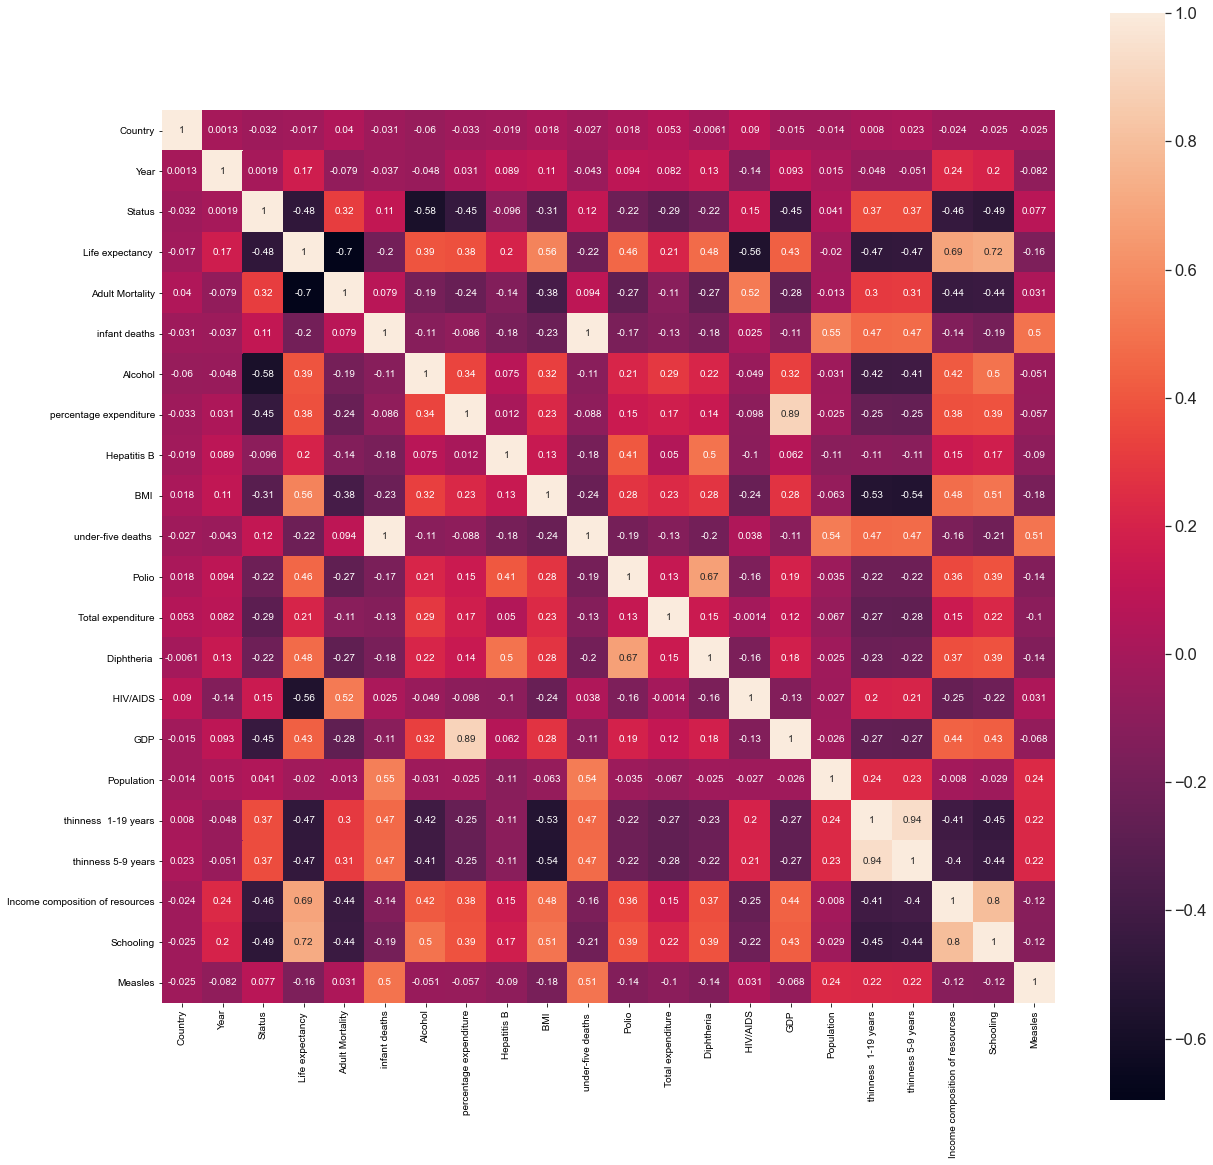

In [12]:
#Performing Correlation using Heatmap visualization
import seaborn as sns
fig = plt.subplots (figsize = (20,20))
sns.set (font_scale = 1.5)
sns.heatmap (data.corr (), square = True, cbar = True, annot = True, annot_kws = {'size': 10})
plt.show ()

In [13]:
data.describe()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Measles
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,95.096324,2007.518720,0.825732,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,38.321247,...,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,1.128929
std,56.244904,4.613841,0.379405,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,19.927677,...,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381,5.350381
min,0.000000,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,1.000000,...,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000
25%,46.000000,2004.000000,1.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,19.400000,...,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000,0.000000
50%,93.000000,2008.000000,1.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,43.000000,...,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000,0.007932
75%,145.000000,2012.000000,1.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,56.100000,...,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000,0.168085
max,192.000000,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,87.300000,...,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,99.000000


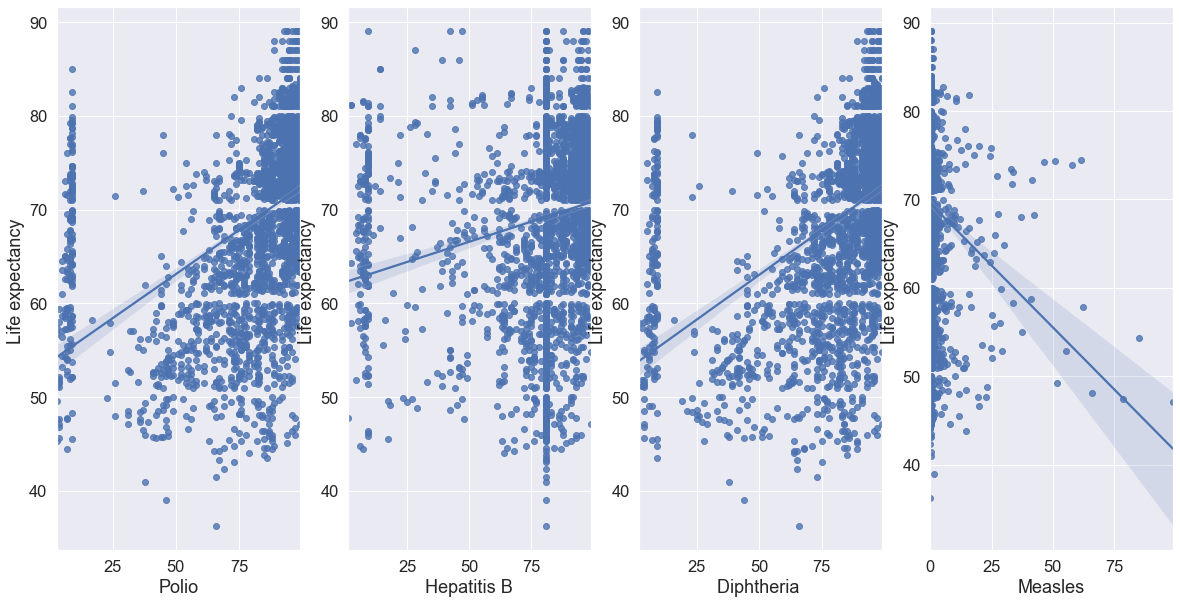

In [15]:
import seaborn as sns
fig, axes = plt.subplots(1,4, figsize=(20,10))
sns.regplot(x="Polio", y="Life expectancy ", data=data, ax=axes[0])
sns.regplot(x="Hepatitis B", y="Life expectancy ", data=data, ax=axes[1])
sns.regplot(x="Diphtheria ", y="Life expectancy ", data=data, ax=axes[2])
sns.regplot(x="Measles", y="Life expectancy ", data=data, ax=axes[3])

plt.show()

In [ ]:
%store data